In [3]:
library('ggplot2')
library(grid)
library(tidyverse)

Warning message:
“Your system is mis-configured: ‘/etc/localtime’ is not a symlink”
Warning message:
“It is strongly recommended to set envionment variable TZ to ‘Etc/UCT’ (or equivalent)”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [165]:
df = read.csv('Results/Lasso.csv')
nulls = read.csv('Results/Null_Results_Lasso.csv')


In [108]:
df$iter = 200
df$type = 'actual'
nulls$type = 'nulls'

In [112]:
combined <- rbind(df,nulls)

In [9]:
options(repr.plot.width = 15, repr.plot.height = 7)

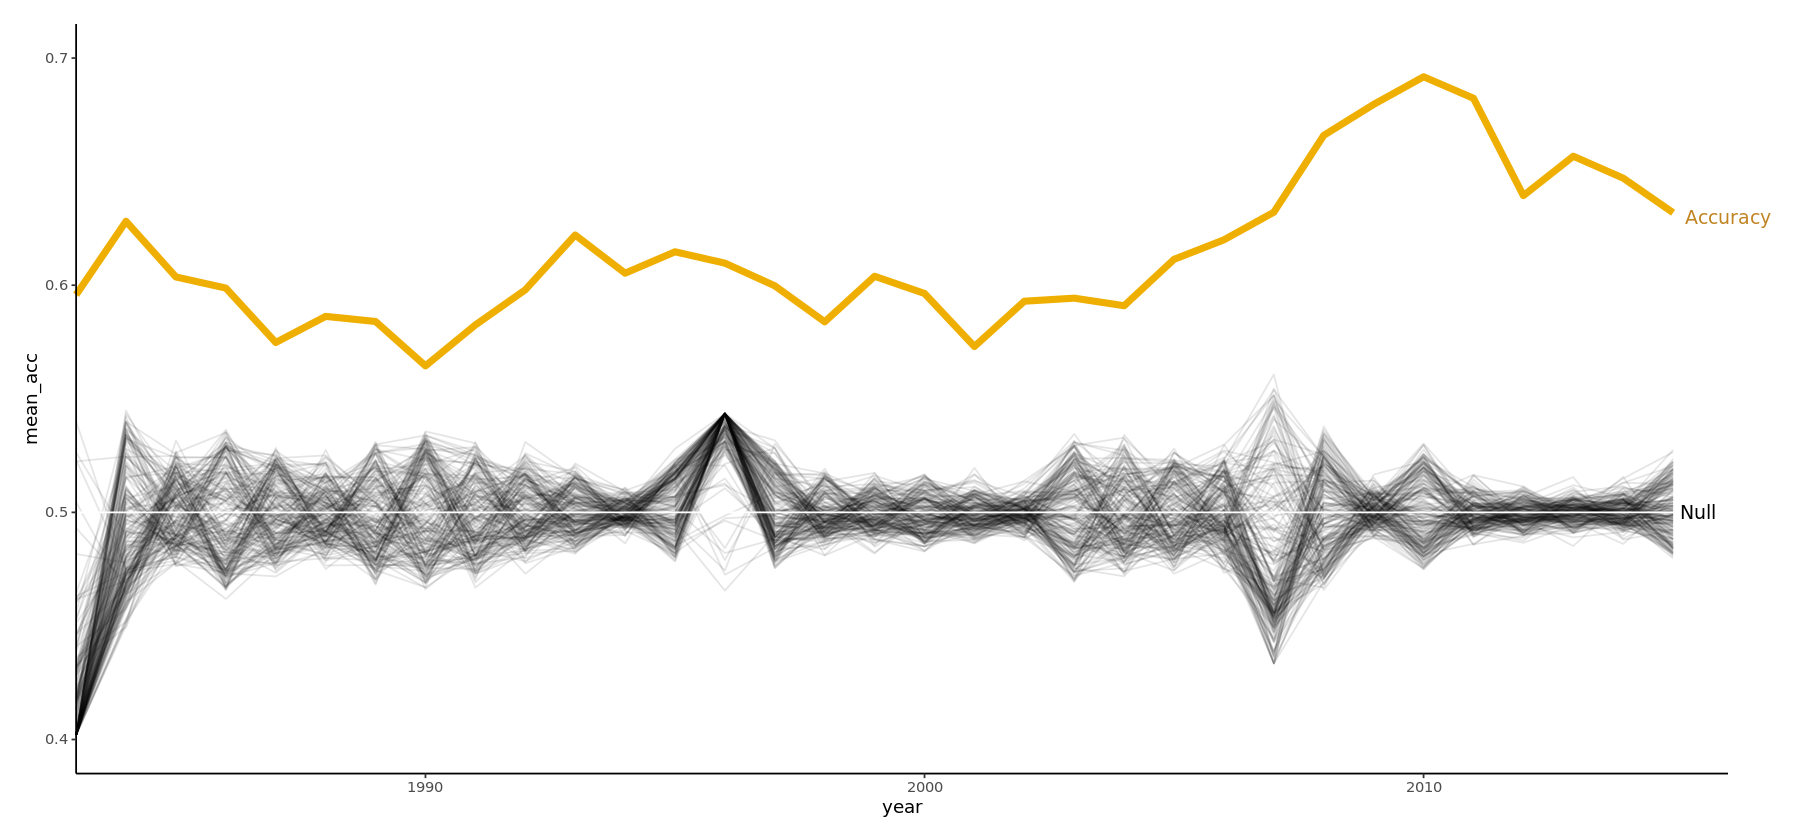

In [123]:

p = ggplot(combined,aes(x = year, y = mean_acc)) + 
  geom_line(data=combined[combined$type == "actual",],color='#efaf00',aes(group=iter),size=2) + 
  geom_line(data=combined[combined$type != "actual",],aes(group=iter),alpha=0.1,size=0.5) + 
  annotate('segment',x=1983,xend=2016,y=0.5,yend=0.5,color='white') +
  theme(panel.background = element_blank(),
        plot.margin = unit(c(1,3,1,1), "lines"),
        axis.line = element_line()) +
  scale_x_continuous(expand = c(0,0)) +
  ylim(0.4,0.7) +
  annotate('text',label='Accuracy',x=2016.1,y=0.63,size=4,color='#c18422') +
  annotate('text',label='Null',x=2015.5,y=0.50,size=4,color='black')


gt <- ggplotGrob(p)
gt$layout$clip[gt$layout$name == "panel"] <- "off"
grid.draw(gt)

Warning message:
“Removed 123 row(s) containing missing values (geom_path).”


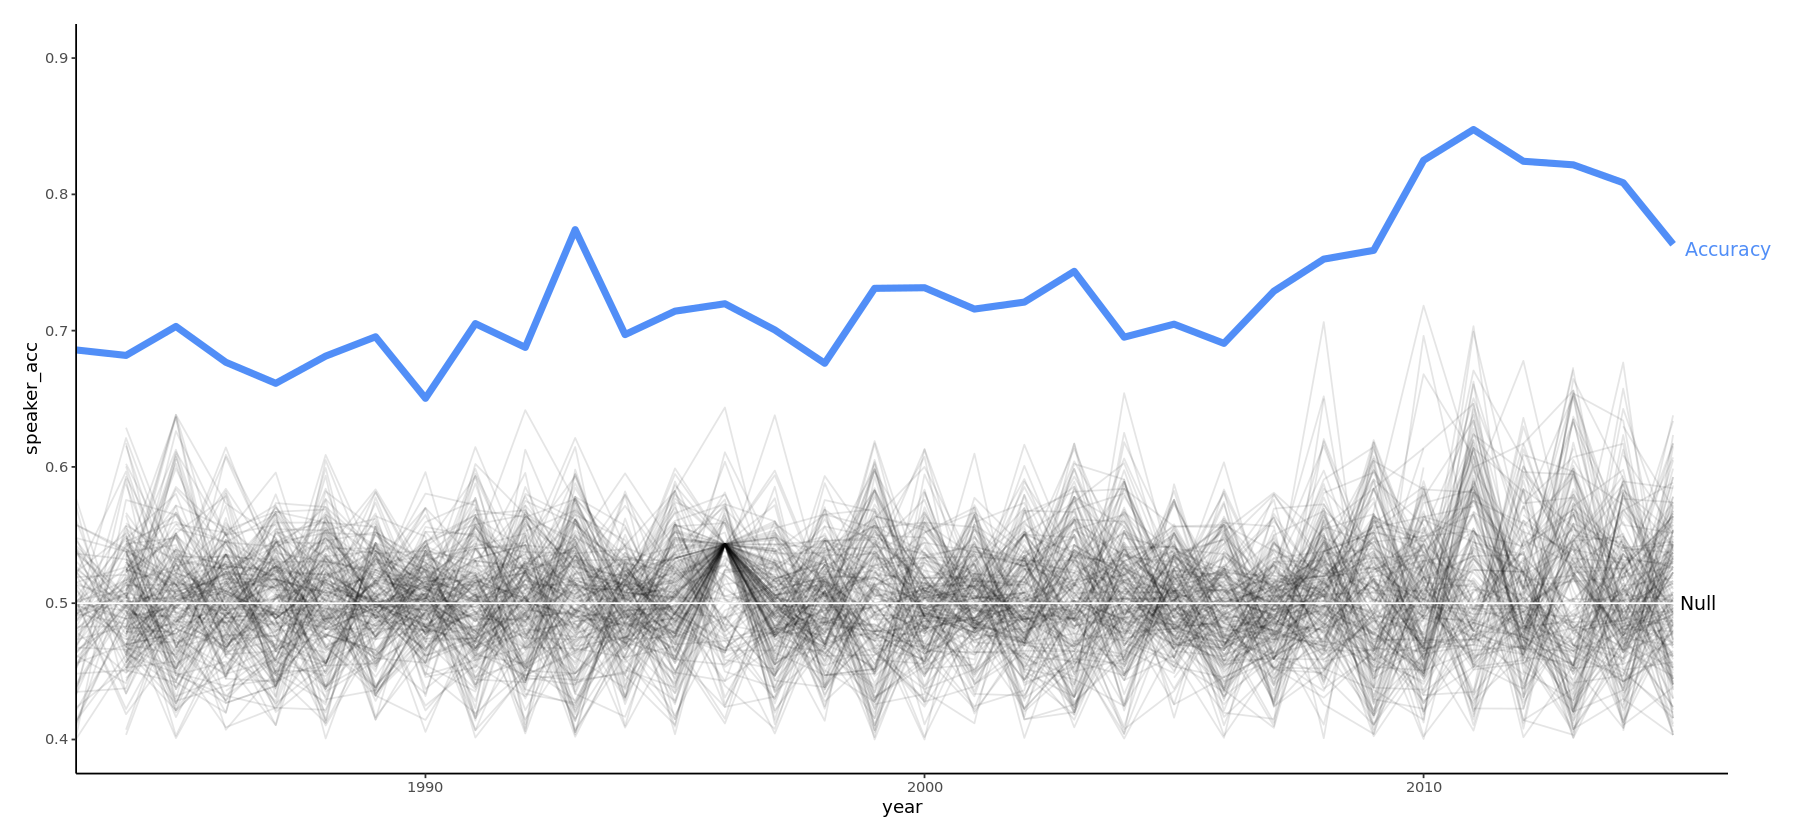

In [132]:
options(repr.plot.width = 15, repr.plot.height = 7)

p = ggplot(combined,aes(x = year, y = speaker_acc)) + 
  geom_line(data=combined[combined$type == "actual",],color='#518ef7',aes(group=iter),size=2) + 
  geom_line(data=combined[combined$type != "actual",],aes(group=iter),alpha=0.1,size=0.5) + 
  annotate('segment',x=1983,xend=2016,y=0.5,yend=0.5,color='white') +
  theme(panel.background = element_blank(),
        plot.margin = unit(c(1,3,1,1), "lines"),
        axis.line = element_line()) +
  scale_x_continuous(expand = c(0,0)) +
  ylim(0.4,.9) +
  annotate('text',label='Accuracy',x=2016.1,y=0.76,size=4,color='#518ef7') +
  annotate('text',label='Null',x=2015.5,y=0.50,size=4,color='black')


gt <- ggplotGrob(p)
gt$layout$clip[gt$layout$name == "panel"] <- "off"
grid.draw(gt)

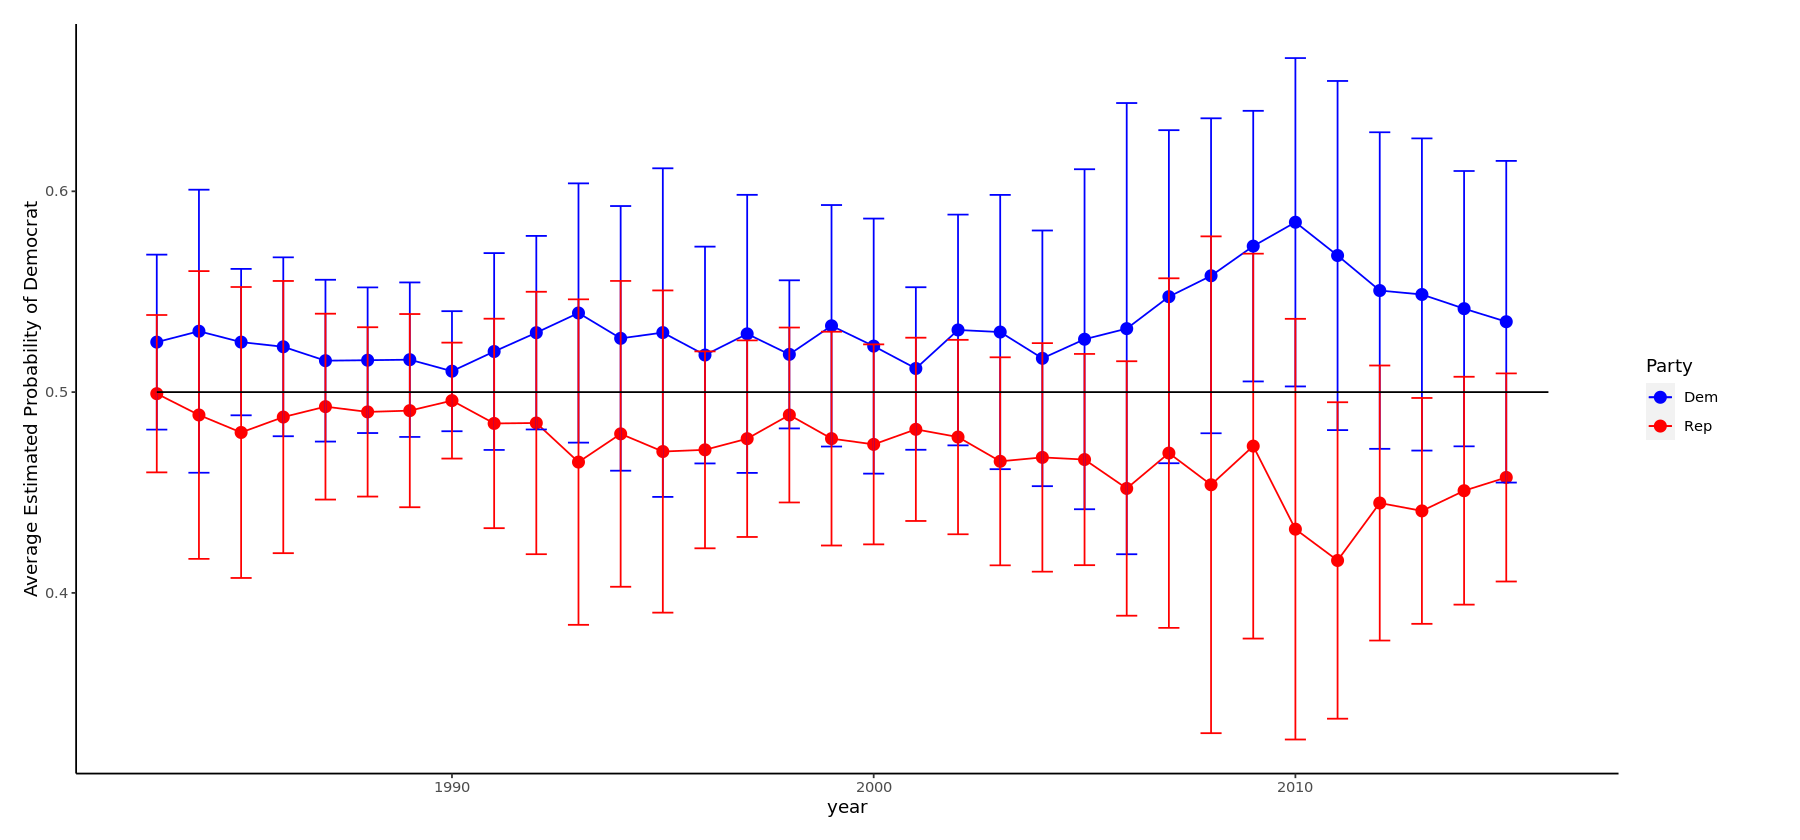

In [154]:
mean_pred <- df %>%
    select(year,Dem_speaker_mean,Rep_speaaker_mean) %>%
    rename(Dem = Dem_speaker_mean,Rep=Rep_speaaker_mean) %>%
    pivot_longer(!year,names_to = 'Party',values_to = 'mean')

std_pred <- df %>%
    select(year,Dem_speaker_std,Rep_speaker_std) %>%
    rename(Dem = Dem_speaker_std,Rep=Rep_speaker_std) %>%
    pivot_longer(!year,names_to = 'Party',values_to = 'std')

mean_pred %>% 
    merge(std_pred,on=c(year,Party)) %>%
    ggplot(aes(x = year, y=mean, color=Party)) +
    geom_point(size=3) + 
    geom_line() + 
    geom_errorbar(aes(ymin=mean-std,ymax=mean+std,width=0.5)) + 
    theme(panel.background = element_blank(),
        plot.margin = unit(c(1,3,1,1), "lines"),
        axis.line = element_line()) + 
    scale_color_manual(values=c('blue','red')) + 
    annotate('segment',x=1983,xend=2016,y=0.5,yend=0.5,color='black') + 
    ylab('Average Estimated Probability of Democrat')

## Supplementals

#### SVC results

In [157]:
svc = read.csv('Results/SVC.csv')

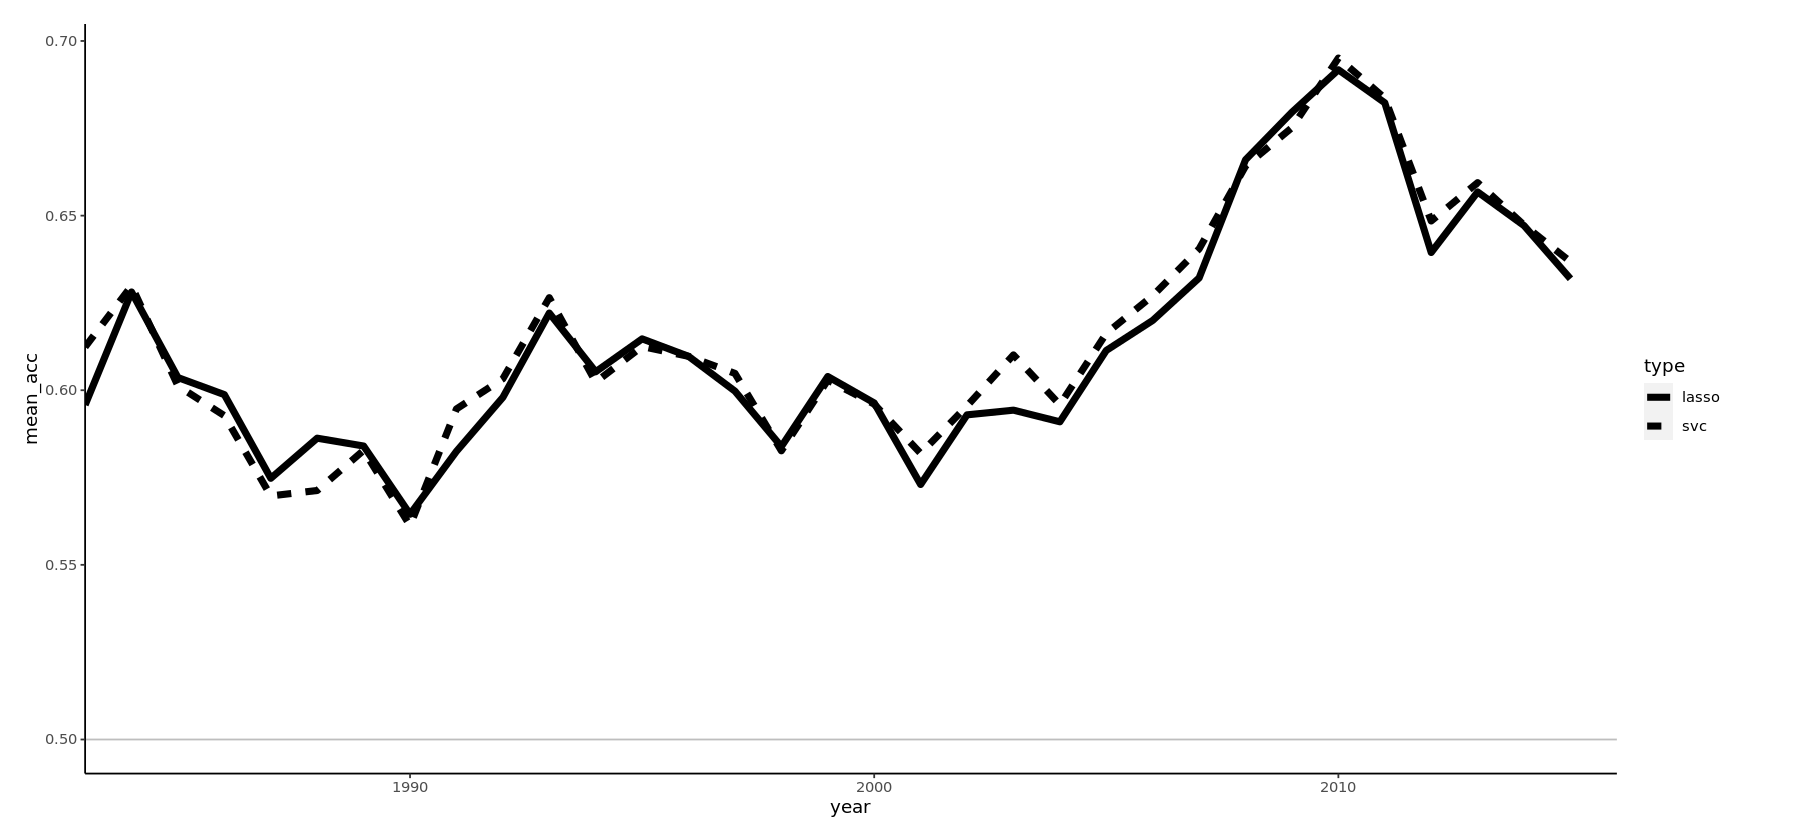

In [173]:
svc$type = 'svc'
df$type = 'lasso'

rbind(svc,df) %>%
    ggplot(aes(x = year, y = mean_acc,linetype=type)) + 
    geom_line(size=2) + 
    annotate('segment',x=1983,xend=2016,y=0.5,yend=0.5,color='grey') +
    theme(panel.background = element_blank(),
        plot.margin = unit(c(1,3,1,1), "lines"),
        axis.line = element_line()) +
    scale_x_continuous(expand = c(0,0))

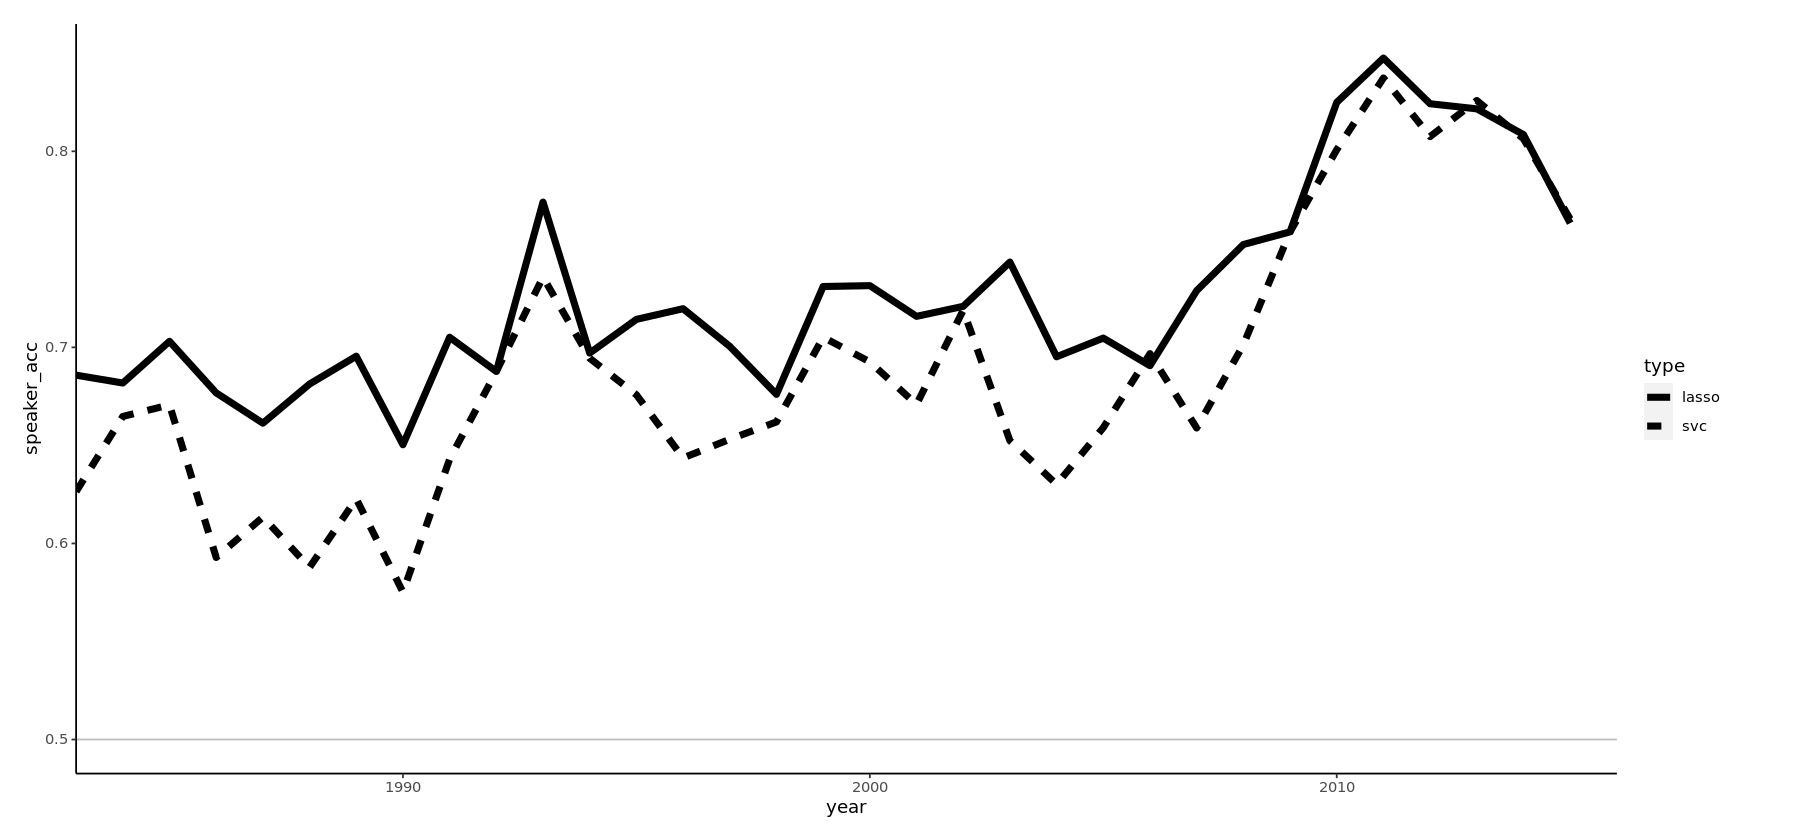

In [175]:
svc$type = 'svc'
df$type = 'lasso'

rbind(svc,df) %>%
    ggplot(aes(x = year, y = speaker_acc,linetype=type)) + 
    geom_line(size=2) + 
    annotate('segment',x=1983,xend=2016,y=0.5,yend=0.5,color='grey') +
    theme(panel.background = element_blank(),
        plot.margin = unit(c(1,3,1,1), "lines"),
        axis.line = element_line()) +
    scale_x_continuous(expand = c(0,0))

### Different k models

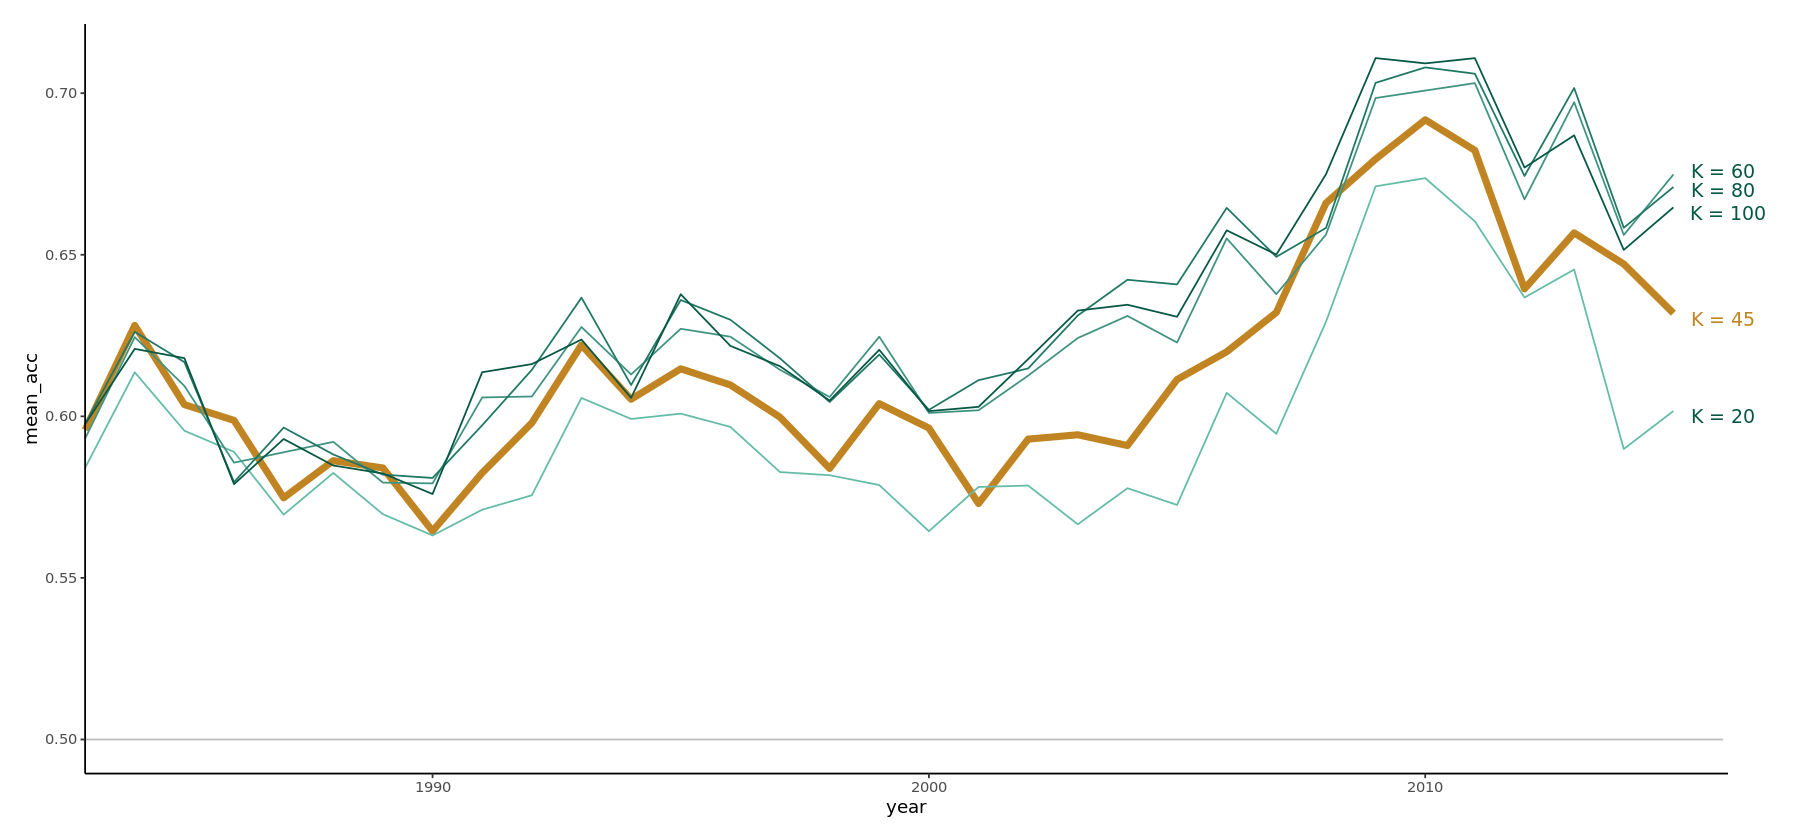

In [58]:
mods <- read.csv('Results/Robustness.csv')

p <- mods %>%
    mutate(k = case_when(k == 45 ~ "k = 45",
                         k == 20 ~ 'k = 20',
                         k == 60 ~ 'k = 60',
                         k == 80 ~ 'k = 80',
                         k == 100 ~ 'k = 100'),
           k = factor(k,levels=c('k = 20','k = 45','k = 60','k = 80','k = 100')),
          type=ifelse(k == 'k = 45','a','b')) %>%
    ggplot(aes(x = year, y = mean_acc, color=k)) + 
    geom_line(aes(size=type)) + 
    annotate('segment',x=1983,xend=2016,y=0.5,yend=0.5,color='grey') +
    theme(panel.background = element_blank(),
        plot.margin = unit(c(1,3,1,1), "lines"),
        axis.line = element_line(),
        legend.position = 'None') +
    scale_x_continuous(expand = c(0,0)) + 
    scale_size_manual(values=c(2,0.5)) + 
    scale_color_manual(values=c('#64bba8','#c18422','#3f9380','#207864','#075745')) + 
    annotate('text',label='K = 45',x=2016,y=0.63,size=4,color='#c18422') +
    annotate('text',label='K = 20',x=2016,y=0.60,size=4,color='#075745') +
    annotate('text',label='K = 60',x=2016,y=0.676,size=4,color='#075745') +
    annotate('text',label='K = 80',x=2016,y=0.67,size=4,color='#075745') +
    annotate('text',label='K = 100',x=2016.1,y=0.663,size=4,color='#075745')

gt <- ggplotGrob(p)
gt$layout$clip[gt$layout$name == "panel"] <- "off"
grid.draw(gt)